<h1>
    Thermodynamics of Materials AD19: <br>
    <b>Class Activity 02</b>
</h1>

<table width="75%" align="center">
    <tr>
        <th align="left" colspan="2">
            <h2><b>Team<b>:</b></h2>
        </th>
    </tr>
    <tr>
        <td><h3>Antonio Osamu Katagiri Tanaka</h3></td>
        <td><h4>A01212611@itesm.mx</h4></td>
    </tr>
    <tr>
        <td><h3>Angel Manuel Villalba Rodríguez</h3></td>
        <td><h4>A00828035@itesm.mx</h4></td>
    </tr>
    <tr>
        <td><h3>Jose Ivan Aviles Castrillo</h3></td>
        <td><h4>A01749804@itesm.mx</h4></td>
    </tr>
</table>

<h2>Leharne, S. (2017). <b>The physical chemistry of high-sensitivity differential scanning calorimetry of biopolymers.</b> ChemTexts, 3(1), 1–12. https://doi.org/10.1007/s40828-016-0038-0</h2>

---

<h1>Figure 1.</h1>

In [9]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

from scipy import special, optimize

# DATA FIG 1
data_df = pd.read_csv("./fig1_data.txt", delimiter=",");
data_df = data_df.sort_values(by=['T']);
data_T  = data_df.iloc[:]['T'];
data_c  = data_df.iloc[:]['C'];
T = np.array(data_T);
C = np.array(data_c);

Equation 21:

$$ K(T) = e^{-\frac{\Delta H_{vH,ref}}{R} \left(\frac{1}{T} - \frac{1}{T_{ref}}\right) + \frac{\Delta C_P}{R} \left(ln\left(\frac{T}{T_{ref}}\right) + \frac{T_{ref}}{T} - 1\right)} $$

In [10]:
#eq 21
def K_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp):
    # x = [T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp]

    R = 8.314/1000;
    
    pwr1 = -(Delta_H_v_ref/R)*((1/T)-(1/T_ref));
    pwr2 = (Delta_Cp/R) * (np.log(T/T_ref) + (T_ref/T) - 1);
    
    res = np.exp(pwr1 + pwr2);
    return res

Equation 18:

$$ f_D = f(T) = \frac{K(T)}{1 + K(T)} $$

In [11]:
#eq 18
def f_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp):
    
    nume = K_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp);
    deno = 1 + K_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp);
    
    res = nume/deno;
    return res;

$$\Delta H_{cal}(T) = H_{cal,ref} + \Delta C_P(T - T_{ref})$$
$$and$$
$$\Delta H_{vH}(T) = H_{vH,ref} + \Delta C_P(T - T_{ref})$$

In [12]:
def Delta_H_cal_(T, Delta_H_cal_ref, T_ref, Delta_Cp):
    return Delta_H_cal_ref + Delta_Cp*(T - T_ref);

def Delta_H_v_(T, Delta_H_v_ref, T_ref, Delta_Cp):
    return Delta_H_v_ref + Delta_Cp*(T - T_ref);

Equation 29 - rewritten:

$$ C_P = \frac{\Delta H_{cal}(T) \Delta H_{vH}(T)}{R T^2} f(T) (1 - f(T)) + f(T) \frac{\Delta H_{cal,ref}}{\Delta H_{vH,ref}} \Delta C_P $$

In [13]:
#eq 29 - rewritten
def C_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp):
    # x = [Delta_cal, Delta_H_v_ref, T_ref, Delta_Cp]
    
    R = 8.314/1000;
    Delta_H_cal = Delta_H_cal_(T, Delta_H_cal_ref, T_ref, Delta_Cp)
    Delta_H_v = Delta_H_v_(T, Delta_H_v_ref, T_ref, Delta_Cp)
    
    fact1_1 = (Delta_H_cal * Delta_H_v)/(R * T**2)
    fact1_2 = f_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp)
    fact1_3 = 1 - f_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp)
    sum1 = fact1_1 * fact1_2 * fact1_3
    
    fact2_1 = f_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp)
    fact2_2 = Delta_H_cal_ref/Delta_H_v_ref
    sum2 = fact2_1 * fact2_2 * Delta_Cp
    
    res = sum1 + sum2
    return res;

In [14]:
# function to fetch a reasonable initial guesses for T_ref
def T_ref_(T, C):
    maxC = max(C);
    for i in range(len(C)):
        if C[i] == maxC:
            return int(T[i]);

In [15]:
# reasonable initial guesses for EOS parameters
Delta_H_cal_ref = 150
Delta_H_v_ref = 150
Delta_Cp = 3

# PRINT table with fittig parameters
tmplt_str_l = "  ".join(["{:<15}"] + ["{:<15}"]*4);
tmplt_str_s = "  ".join(["{:<15}"] + ["{:<15.7}"]*4);
print('Fitting')
print(tmplt_str_l.format(*['parameters:', 'Delta_H_cal_ref', 'Delta_H_vH_ref', 'T_ref', 'Delta_Cp']));
print("-" * 76);

T_ref = T_ref_(T, C); # reasonable initial guesses for T_ref EOS parameter
C_prev = C_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp);

p0 = Delta_H_cal_ref, Delta_H_v_ref, T_ref, Delta_Cp
results = optimize.curve_fit(C_, T, C, p0)

Delta_cal_H_ref = results[0][0];
Delta_v_H_ref = results[0][1];
T_ref = results[0][2];
Delta_Cp = results[0][3];

C_fit = C_(T, Delta_cal_H_ref, Delta_v_H_ref, T_ref, Delta_Cp);
print(tmplt_str_s.format('Figure 1', *results[0], 0));

Fitting
parameters:      Delta_H_cal_ref  Delta_H_vH_ref   T_ref            Delta_Cp       
----------------------------------------------------------------------------
Figure 1         197.129          210.8386         328.9682         3.036027       


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

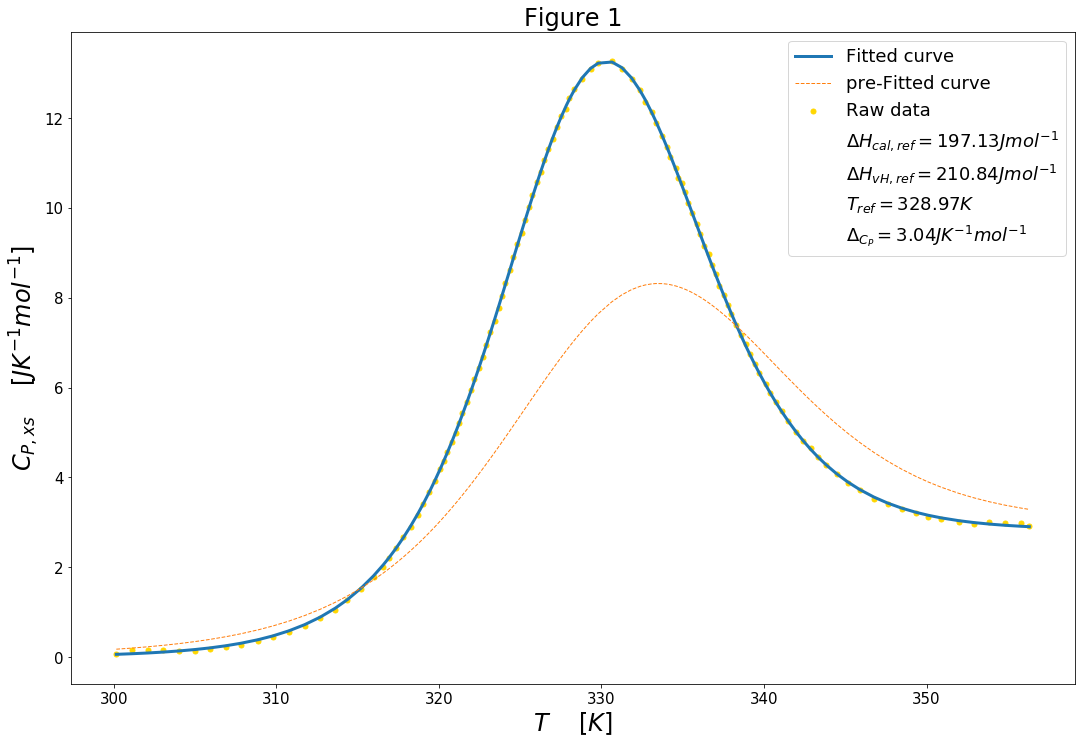

In [17]:
# PLOT FIG 1
scale = 6;
fig, ax = plt.subplots(figsize=(3*scale, 2*scale));

# Plot
plt.scatter(T, C, s=25, color='gold', label='Raw data');
plt.plot(T, C_fit, '-', linewidth=3, label='Fitted curve')

ax.set(autoscale_on=False)
plt.plot(T, C_prev, '--', linewidth=1, label='pre-Fitted curve')

# Print fitting parameters as plot legends
x = T[0]
y = C[0]
plt.scatter(x, y, s=0, label=r'$\Delta H_{cal,ref} = $' + str(round(Delta_cal_H_ref, 2)) + r'$J {mol}^{-1}$')
plt.scatter(x, y, s=0, label=r'$\Delta H_{vH,ref} = $' + str(round(Delta_v_H_ref, 2)) + r'$J {mol}^{-1}$')
plt.scatter(x, y, s=0, label=r'$T_{ref} = $' + str(round(T_ref, 2)) + r'$K$')
plt.scatter(x, y, s=0, label=r'$\Delta_{C_P} = $' + str(round(Delta_Cp, 2)) + r'$J K^{-1} {mol}^{-1}$')

# Display plots
plt.yscale('linear');
plt.xlabel(r'$T$' + '    ' + r'$[K]$', fontsize=24);
plt.ylabel(r'$C_{P,xs}$' + '    ' + r'$[J K^{-1} mol^{-1}]$', fontsize=24);
plt.title('Figure 1', size=24);
plt.legend(prop={'size': 18});
display(plt);